In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('bodyPerformance.csv')
data.info

<bound method DataFrame.info of         age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  

In [3]:
data.size

160716

In [4]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [5]:
data['gender']

0        1
1        1
2        1
3        1
4        1
        ..
13388    1
13389    1
13390    1
13391    0
13392    1
Name: gender, Length: 13393, dtype: int64

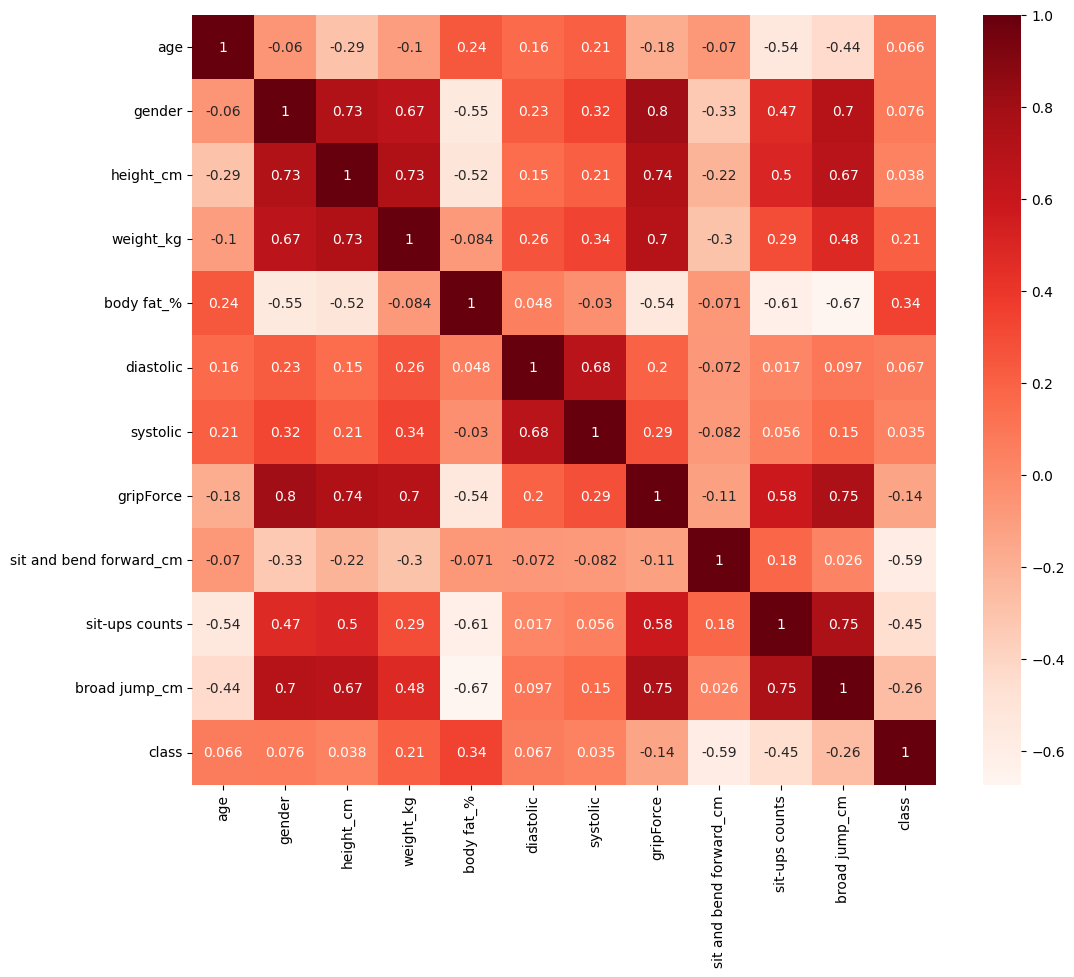

In [6]:
plt.figure(figsize=(12,10))
cor = data.corr(numeric_only=False)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
cor_target = abs(cor["gender"])
cor_target.sort_values(ascending=False)

gender                     1.000000
gripForce                  0.800184
height_cm                  0.730899
broad jump_cm              0.704149
weight_kg                  0.672887
body fat_%                 0.551407
sit-ups counts             0.474596
sit and bend forward_cm    0.327467
systolic                   0.323921
diastolic                  0.228552
class                      0.075605
age                        0.060229
Name: gender, dtype: float64

As we see, the most impactful fields are sit and bend forward_cm, sit-ups counts and body fat % while the least impactful are age, height_cm and systolic.

In [15]:
model = LogisticRegression()

# split our data
X_train, X_test, y_train, y_test = train_test_split(data[['gripForce', 'height_cm', 'broad jump_cm']],
                                                         data['gender'], 
                                                    test_size=0.4, 
                                                    random_state=42)
model.fit(X_train, y_train)

predicted_class = model.predict(X_test)
predicted_class

KeyboardInterrupt: 

In [10]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted_class)
r_squared = model.score(X_train, y_train)
print("Mean Squared Error:", mse)
print("R squared: ", r_squared)

Mean Squared Error: 0.04647256438969765
R squared:  0.9523335407591786


# Using handbook version

In [12]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate: float = 0.05, max_iter: int = 100000) -> None:
        '''
        The constructor of the Logistic Regression model.
        
        :param learning_rate: float, default=0.05
            The learning rate of the model.
        :param max_iter: int, default=100000
            The number of iterations to go through.
        '''
        # Setting up the hyperparameters.
        self.__learning_rate = learning_rate
        self.__max_iter = max_iter

    def sigmoid(self, y: np.array) -> np.array:
        '''
        The sigmoid function.
        
        :param y: np.array
            The predictions of the linear function.
        '''
        return 1 / (1 + np.exp(-y))

    def fit(self, X: np.array, y: np.array) -> 'LogisticRegression':    
        '''
        The fit function of the model.

        :param X: 2-d np.array
         The matrix with the features.
        :param y: 1-d np.array
         The target vector.
        '''
        # Adding the intercept column.
        X = np.hstack((X, np.ones((len(X), 1))))
        # Initializing weights vector.
        self.coef_ = np.zeros(len(X[0]))

        for _ in range(self.__max_iter):
            # Prediction.
            pred = self.sigmoid(np.dot(X, self.coef_))
            # Computing the gradient.
            gradient = np.dot(X.T, pred - y) / y.size
            # Updating the weights.
            self.coef_ -= gradient * self.__learning_rate

        return self


    def predict_proba(self, X: np.array) -> np.array:
        '''
        This function returns the class probabilities.
        
        :param X: 2-d np.array
            The features matrix.
        :return: 2-d np.array
            The array with the probabilities for every class for every sample.
        '''
        # Adding the intercept column.
        X = np.hstack((X, np.ones((len(X), 1))))
        # Computing the probabilities.
        prob = self.sigmoid(np.dot(X, self.coef_))
        # Returning the probabilities.
        return np.hstack(((1 - prob).reshape(-1, 1), prob.reshape(-1, 1)))

    def predict(self, X: np.array) -> np.array:
        '''
        This function returns the predictions of the model.
        
        :param X: 2-d np.array
            The features matrix.
        :return: 1-d np.array
            The predicted class labels (0 or 1) for every sample.
        '''
        # Adding the intercept column.
        X = np.hstack((X, np.ones((len(X), 1))))
        return (self.sigmoid(np.dot(X, self.coef_)) > 0.5)


In [13]:
model = LogisticRegression()
model = model.fit(np.array(X_train), np.array(y_train))

/tmp/ipykernel_1053/901048336.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-y))


KeyboardInterrupt: 

In [ ]:
model.predict(X_test)

array([ True,  True,  True, ...,  True,  True,  True])